# Build the UMAP and DotPlots of the article:
- UMAP raw data
- UMAP single gene attack on Naive B cells
- UMAP of max change attack on Naive B cells
- DotPlot of raw data
- DotPlot of single gene attack on Naive B cells
- DotPlot of max change attack on Naive B cells

In [1]:
library(Seurat)
library(adverSCarial)
library(TENxPBMCData)
library(ggplot2)
library(HGNChelper)
library(IRdisplay)

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians

In [2]:
pbmc.data <- Read10X(data.dir = "pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices//hg19")
# Initialize the Seurat object with the raw data.
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [3]:
# Apply scType process, based on Seurat process
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
# pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5) # make some filtering based on QC metrics visualizations, see Seurat tutorial: https://satijalab.org/seurat/articles/pbmc3k_tutorial.html
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# scale and run PCA
pbmc <- ScaleData(pbmc, features = rownames(pbmc))
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

# Check number of PC components (we selected 10 PCs for downstream analysis, based on Elbow plot)
# ElbowPlot(pbmc)

# cluster and visualize
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.8)
pbmc <- RunUMAP(pbmc, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  MALAT1, LTB, IL32, CD2, ACAP1, STK17A, CTSW, CD247, CCL5, GIMAP5 
	   AQP3, GZMA, CST7, TRAF3IP3, MAL, HOPX, ITM2A, GZMK, MYC, BEX2 
	   GIMAP7, ETS1, LDLRAP1, ZAP70, LYAR, RIC3, TNFAIP8, KLRG1, SAMD3, NKG7 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, CTSS, S100A8, SERPINA1, LGALS2, SPI1, IFITM3, PSAP 
	   CFP, SAT1, IFI30, COTL1, S100A11, NPC2, LGALS3, GSTP1, PYCARD, NCF2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DRA, HLA-DQB1, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DPB1, HLA-DMA, HLA-DQA2, HLA-DRB5, HLA-DPA1, HLA-DMB, FCRLA, HVCN1, LTB, BLNK 
	   KIAA0125, P2RX5, IRF8, IGLL5, SWAP70, ARHGAP24, SMIM14, PPP1R14A, FCRL2, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMA, GZMB, FGFBP2, CTSW, GNLY, GZMH, SPON2 
	   CCL4, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX, CTSC 
	   TTC38, S100A4, ANXA1, IL32, IGFBP7, ID2, ACTB, XCL1, APOBEC3G, SAMD3 
PC_ 3 
Positive:  HLA-

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 97892

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8314
Number of communities: 11
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
06:58:08 UMAP embedding parameters a = 0.9922 b = 1.112

06:58:08 Read 2700 rows and found 10 numeric columns

06:58:08 Using Annoy for neighbor search, n_neighbors = 30

06:58:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:58:08 Writing NN index file to temp file /tmp/RtmpjSUWsu/file1566a95420d607

06:58:08 Searching Annoy index using 1 thread, search_k = 3000

06:58:09 Annoy recall = 100%

06:58:10 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [4]:
Class_sctype = function(expr, clusters, target){
    expr = t(expr)
    if ( !exists("sctype_score")){
        source("https://raw.githubusercontent.com/IanevskiAleksandr/sc-type/master/R/sctype_score_.R")
    }
    if (!exists("gs_list")){
        source("https://raw.githubusercontent.com/IanevskiAleksandr/sc-type/master/R/gene_sets_prepare.R")
        db_ = "https://raw.githubusercontent.com/IanevskiAleksandr/sc-type/master/ScTypeDB_full.xlsx";
        tissue = "Immune system" # e.g. Immune system,Pancreas,Liver,Eye,Kidney,Brain,Lung,Adrenal,Heart,Intestine,Muscle,Placenta,Spleen,Stomach,Thymus 
        # prepare gene sets
        gs_list = gene_sets_prepare(db_, tissue)
    }

    es.max = sctype_score(scRNAseqData = expr, scaled = T, 
                          gs = gs_list$gs_positive, gs2 = gs_list$gs_negative)
    
    if (sum(clusters == target) == 0 ){
        return( c("UNDETERMINED",1))
    }
    table_cell_type <<- table(apply(t(es.max[, clusters == target]), 1, function(x){
        names(x[x == max(x)])[1]
    }))
    str_class <- names(table_cell_type[order(table_cell_type, decreasing=T)][1])
    c(str_class, 1)
}

In [5]:
pbmc@meta.data$clust_sc_type = ""
for (seur_clust in unique(pbmc@meta.data$seurat_clusters)){
    display(seur_clust)
    pbmc@meta.data$clust_sc_type[pbmc@meta.data$seurat_clusters == seur_clust] = Class_sctype(t(pbmc[["RNA"]]$scale.data), pbmc@meta.data$seurat_clusters, seur_clust)[1]
}

[1] "1"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "2"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "7"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "8"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "3"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "6"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "0"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "4"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "5"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "9"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "10"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

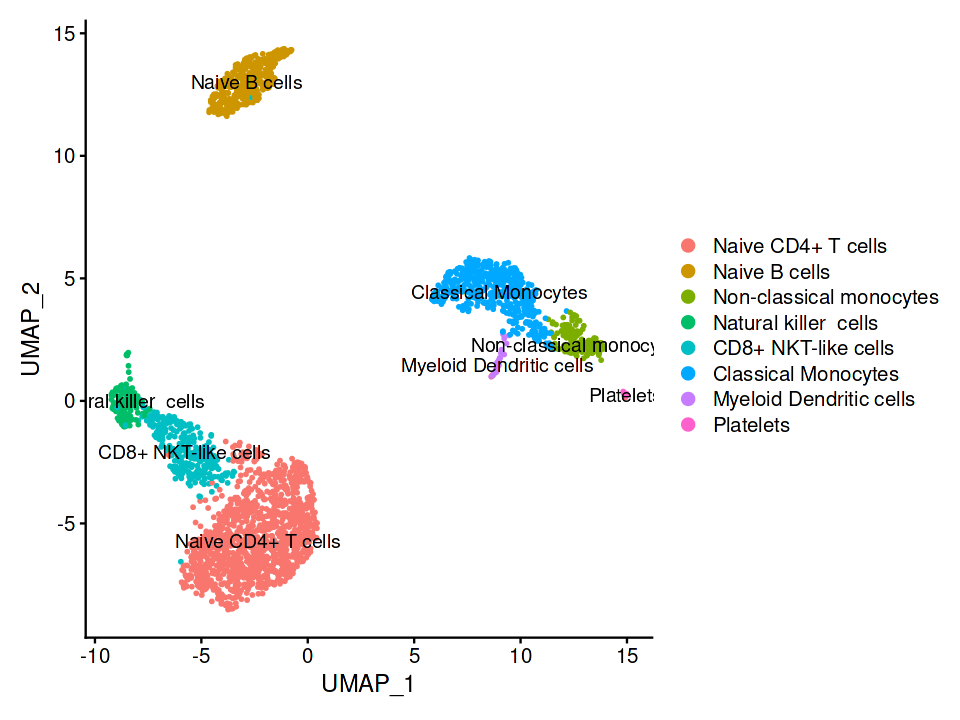

In [17]:
Idents(pbmc) = "clust_sc_type"
DimPlot(pbmc, label=T)

In [24]:
color_vector

[1] "darkorange"    "forestgreen"   "steelblue"     "firebrick"    
[5] "mediumorchid"  "darkgoldenrod" "deepskyblue"   "hotpink"

In [34]:
color_vector = c("lightsalmon",       # lighter version of darkorange
  "lightgreen",        # lighter version of forestgreen
  "lightsteelblue",    # lighter version of steelblue
  "lightcoral",        # lighter version of firebrick
  "plum",              # lighter version of mediumorchid
  "palegoldenrod",     # lighter version of darkgoldenrod
  "skyblue","lightpink")  

## UMAP of raw data

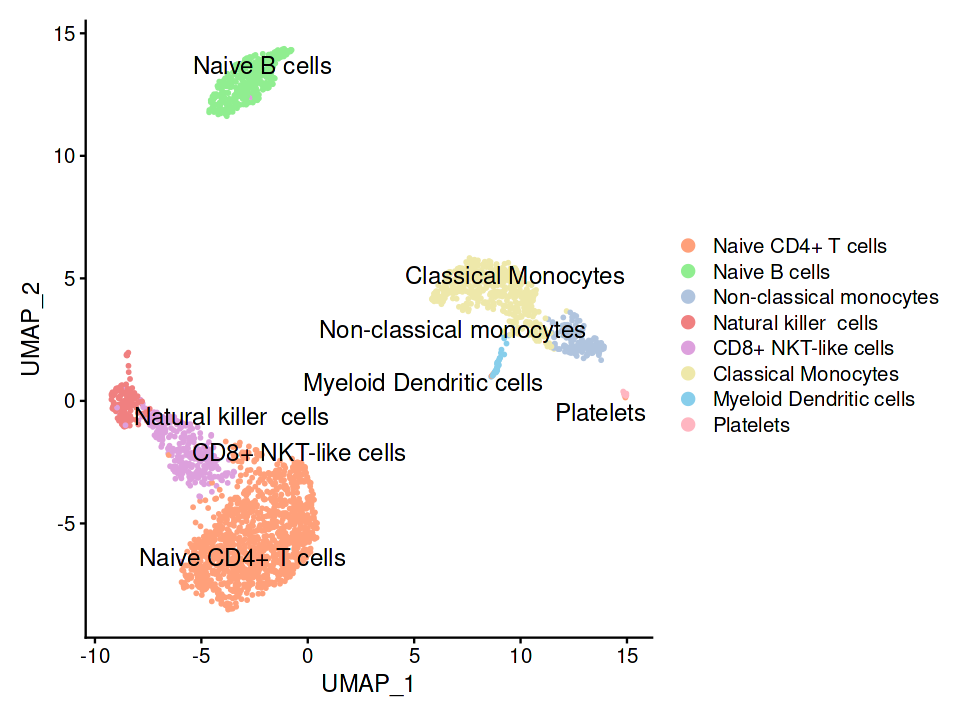

In [102]:
Idents(pbmc) = "clust_sc_type"
DimPlot(pbmc, label = T, cols=color_vector, repel=T, label.size=5)
ggsave("docs/appnote/pics/fig01_scale_A_umap.png", width=8, height=6)

# Proceed to min change attack of Naive B cells cluster

In [36]:
pbmc_min_change = pbmc

In [39]:
mod_mat = advModifications(as.matrix(t(pbmc[["RNA"]]$scale.data)),
                       "ICAM1",
                      pbmc@meta.data$clust_sc_type,
                      "Naive B cells")

In [40]:
head(pbmc_min_change[["RNA"]]$scale.data)

,AAACATACAACCAC-1,AAACATTGAGCTAC-1,AAACATTGATCAGC-1,AAACCGTGCTTCCG-1,AAACCGTGTATGCG-1,AAACGCACTGGTAC-1,AAACGCTGACCAGT-1,AAACGCTGGTTCTT-1,AAACGCTGTAGCCA-1,AAACGCTGTTTCTG-1,⋯,TTTCAGTGTCACGA-1,TTTCAGTGTCTATC-1,TTTCAGTGTGCAGT-1,TTTCCAGAGGTGAG-1,TTTCGAACACCTGA-1,TTTCGAACTCTCAT-1,TTTCTACTGAGGCA-1,TTTCTACTTCCTCG-1,TTTGCATGAGAGGC-1,TTTGCATGCCTCAC-1
AL627309.1,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,⋯,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997,-0.05744997
AP006222.2,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,⋯,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769,-0.03318769
RP11-206L10.2,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,⋯,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635,-0.04118635
RP11-206L10.9,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,⋯,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679,-0.03325679
LINC00115,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,⋯,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413,-0.08128413
NOC2L,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,⋯,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160,-0.31545160


In [42]:
dim(pbmc_min_change[["RNA"]]$scale.data)

[1] 13714  2700

In [41]:
head(mod_mat)

<6 x 13714> DelayedMatrix object of type "double":
                  AL627309.1  AP006222.2 ...    PNRC2.1   SRSF10.1
AAACATACAACCAC-1 -0.05744997 -0.03318769   . -0.2023084 -0.1582736
AAACATTGAGCTAC-1 -0.05744997 -0.03318769   . -0.2023084 -0.1582736
AAACATTGATCAGC-1 -0.05744997 -0.03318769   . -0.2023084 -0.1582736
AAACCGTGCTTCCG-1 -0.05744997 -0.03318769   . -0.2023084 -0.1582736
AAACCGTGTATGCG-1 -0.05744997 -0.03318769   . -0.2023084 -0.1582736
AAACGCACTGGTAC-1 -0.05744997 -0.03318769   . -0.2023084 -0.1582736

In [43]:
dim(mod_mat)

[1]  2700 13714

In [44]:
# Replace scale data by the the modified values
pbmc_min_change[["RNA"]]$scale.data = as.matrix(t(mod_mat))

### Compute the new UMAP data

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FCN1, LYZ, FTH1, S100A9, FCER1G 
	   TYMP, CFD, LGALS1, S100A8, SERPINA1, LGALS2, CTSS, IFITM3, SPI1, PSAP 
	   CFP, S100A11, SAT1, IFI30, COTL1, NPC2, LGALS3, GSTP1, PYCARD, S100A6 
Negative:  MALAT1, LTB, IL32, ICAM1, CD2, ACAP1, STK17A, CTSW, CD247, CCL5 
	   GIMAP5, AQP3, GZMA, TRAF3IP3, CST7, MAL, MYC, HOPX, GZMK, ITM2A 
	   BEX2, ETS1, LDLRAP1, GIMAP7, RIC3, CD79A, ZAP70, TNFAIP8, LYAR, KLRG1 
PC_ 2 
Positive:  ICAM1, CD79A, MS4A1, HLA-DQA1, HLA-DQB1, HLA-DRA, CD79B, TCL1A, LINC00926, CD74 
	   HLA-DRB1, HLA-DPB1, HLA-DPA1, HLA-DRB5, HLA-DQA2, HLA-DMA, HLA-DMB, HVCN1, FCRLA, KIAA0125 
	   BLNK, IRF8, P2RX5, IGLL5, SWAP70, SMIM14, ARHGAP24, PPP1R14A, FCRL2, MZB1 
Negative:  NKG7, GZMA, CST7, CTSW, IL32, PRF1, GZMB, S100A4, FGFBP2, CD247 
	   CCL5, ANXA1, GNLY, GIMAP7, GZMH, SPON2, TMSB4X, CCL4, SRGN, FCGR3A 
	   ID2, XCL2, CLIC3, HOPX, AKR1C3, GIMAP4, CTSC, ACTB, GAPDH, CD2 
PC_ 3 
Positive:  ICAM1, GZMB, NKG7, FGFBP2, PRF1, CST7, G

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 97586

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8326
Number of communities: 11
Elapsed time: 0 seconds


07:30:01 UMAP embedding parameters a = 0.9922 b = 1.112

07:30:01 Read 2700 rows and found 10 numeric columns

07:30:01 Using Annoy for neighbor search, n_neighbors = 30

07:30:01 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:30:01 Writing NN index file to temp file /tmp/RtmpjSUWsu/file1566a96c139cc5

07:30:01 Searching Annoy index using 1 thread, search_k = 3000

07:30:02 Annoy recall = 100%

07:30:13 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:30:14 Initializing from normalized Laplacian + noise (using irlba)

07:30:14 Commencing optimization for 500 epochs, with 107706 positive edges

07:30:18 Optimization finished



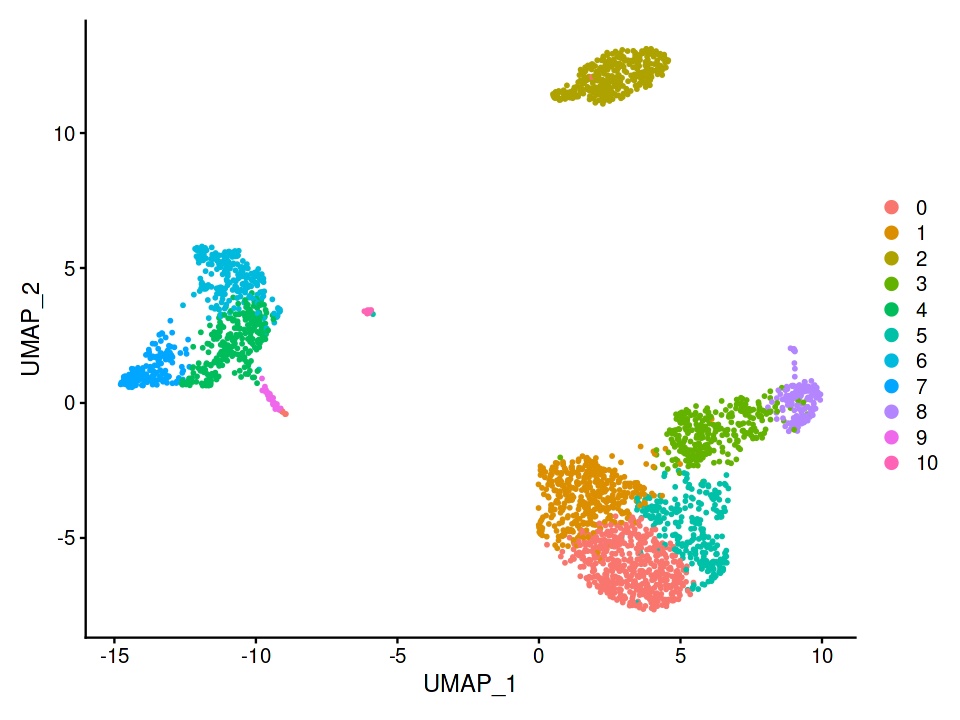

In [56]:
pbmc_min_change <- RunPCA(pbmc_min_change, features = c(VariableFeatures(object = pbmc_min_change), "ICAM1"))

# Check number of PC components (we selected 10 PCs for downstream analysis, based on Elbow plot)
# ElbowPlot(pbmc)

# cluster and visualize
pbmc_min_change <- FindNeighbors(pbmc_min_change, dims = 1:10)
pbmc_min_change <- FindClusters(pbmc_min_change, resolution = 0.8)
pbmc_min_change <- RunUMAP(pbmc_min_change, dims = 1:10)
DimPlot(pbmc_min_change, reduction = "umap")

In [75]:
pbmc_min_change@meta.data$after_attack = pbmc_min_change@meta.data$clust_sc_type
for ( str_cell_ctype in unique(pbmc_min_change@meta.data$clust_sc_type)){
    new_classif = Class_sctype(t(pbmc_min_change[["RNA"]]$scale.data), pbmc_max_change@meta.data$clust_sc_type, str_cell_ctype)[1]
    display(str_cell_ctype)
    display(new_classif)
    pbmc_min_change@meta.data$after_attack[pbmc_min_change@meta.data$clust_sc_type == str_cell_ctype] = new_classif
}

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Naive CD4+ T cells"

[1] "Naive CD4+ T cells"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Naive B cells"

[1] "Endothelial"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Non-classical monocytes"

[1] "Non-classical monocytes"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Natural killer  cells"

[1] "Natural killer  cells"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "CD8+ NKT-like cells"

[1] "CD8+ NKT-like cells"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Classical Monocytes"

[1] "Classical Monocytes"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Myeloid Dendritic cells"

[1] "Myeloid Dendritic cells"

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Platelets"

[1] "Platelets"

### UMAP of single gene attacked Naive B cells

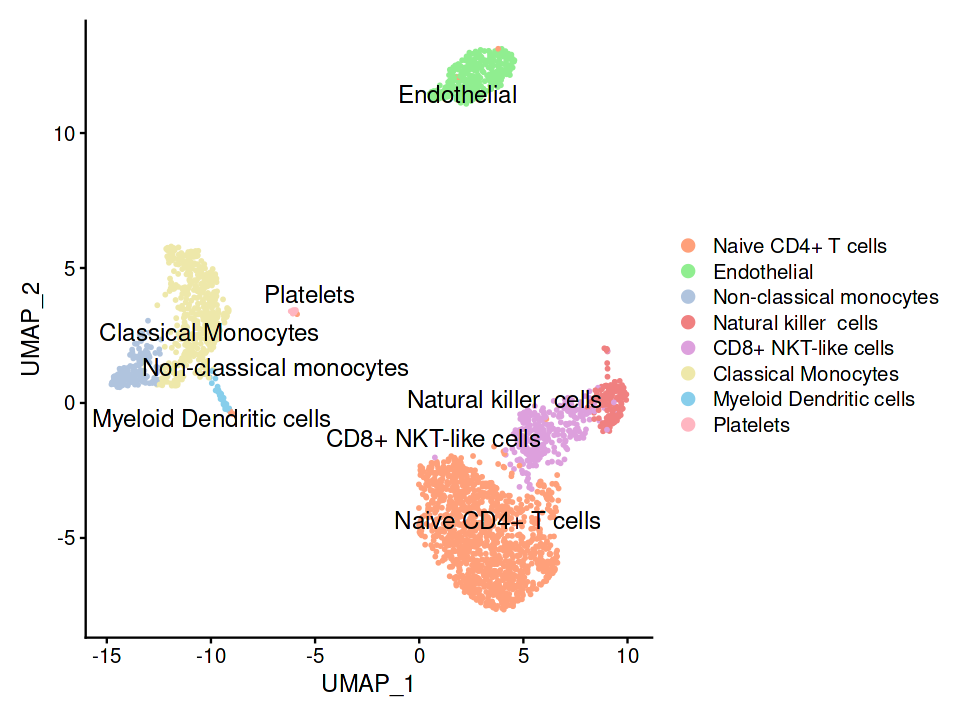

In [76]:
Idents(pbmc_min_change) = "after_attack"
DimPlot(pbmc_min_change, label = T, cols=color_vector, repel=T, label.size=5)
ggsave("docs/appnote/pics/fig01_scale_A_min_change_umap.png", width=8, height=6)

# Load max change attack

In [57]:
df_max_attack = read.table("results/perc99_max_change_Naive B cells.txt")
head(df_max_attack)

,x
,<chr>
1,RP11-206L10.2
2,KLHL17
3,RP11-54O7.11
4,TNFRSF18
5,FAM132A
6,CPSF3L


In [91]:
dim(df_max_attack)

[1] 13705     1

In [61]:
mat_max_mod = advModifications(as.matrix(t(pbmc[["RNA"]]$scale.data)),
                       df_max_attack$x,
                      pbmc@meta.data$clust_sc_type,
                      "Naive B cells",
                              argForClassif="data.frame")

In [63]:
pbmc_max_change = pbmc

In [64]:
# Replace scale data by the the modified values
pbmc_max_change[["RNA"]]$scale.data = as.matrix(t(mat_max_mod))

### Compute the new UMAP data

PC_ 1 
Positive:  JAKMIP1, RP11-390E23.6, PLD6, C1orf54, BCDIN3D, MPP6, TP53BP2, OSBPL7, PRUNE, AC113189.5 
	   RHEBL1, HEXIM2, TANGO6, FBXW4, DENND6A, E2F3, HBEGF, TNFRSF13B, UBAP2, SREBF1 
	   DYNC2LI1, HMG20A, ZNF468, GLYCTK, STK11IP, C16orf58, GTF2H2, ITCH, TAF1, SYTL2 
Negative:  FCGR3A, FCGR1A, TRIM23, CPNE5, TSPAN15, RP11-367G6.3, DTX3, NAIP, TGFBRAP1, IL6 
	   RGMB, RP11-164H13.1, FAM221A, SIRT1, KCNG1, FBXO41, ANKAR, SLC48A1, MRM1, FAM212A 
	   OBSCN, CCL4L1, NEXN, RP11-488C13.5, LDOC1L, GTPBP2, TNFRSF17, ZNF232, HBA1, CEACAM4 
PC_ 2 
Positive:  CST3, FTL, LST1, AIF1, TYROBP, FTH1, FCN1, S100A9, LYZ, TYMP 
	   CFD, FCER1G, S100A8, CTSS, LGALS1, LGALS2, SERPINA1, SPI1, SAT1, IFITM3 
	   PSAP, NPC2, CFP, IFI30, COTL1, S100A11, HLA-DRA, LGALS3, HLA-DRB1, GPX1 
Negative:  MALAT1, IL32, LTB, CD2, CTSW, CD247, ACAP1, CCL5, GZMA, STK17A 
	   CST7, GIMAP5, AQP3, GIMAP7, NKG7, HOPX, PRF1, TRAF3IP3, GZMK, MAL 
	   ZAP70, ITM2A, LYAR, SAMD3, KLRG1, ETS1, LDLRAP1, RORA, FGFBP2, SH2D1A 
PC

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2700
Number of edges: 144699

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4966
Number of communities: 6
Elapsed time: 0 seconds


14:58:52 UMAP embedding parameters a = 0.9922 b = 1.112

14:58:52 Read 2700 rows and found 10 numeric columns

14:58:52 Using Annoy for neighbor search, n_neighbors = 30

14:58:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:58:53 Writing NN index file to temp file /tmp/RtmpjSUWsu/file1566a924772386

14:58:53 Searching Annoy index using 1 thread, search_k = 3000

14:58:54 Annoy recall = 89.74%

14:59:09 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:59:09 331 smooth knn distance failures

14:59:11 Initializing from normalized Laplacian + noise (using irlba)

14:59:11 Commencing optimization for 500 epochs, with 111556 positive edges

14:59:16 Optimization finished



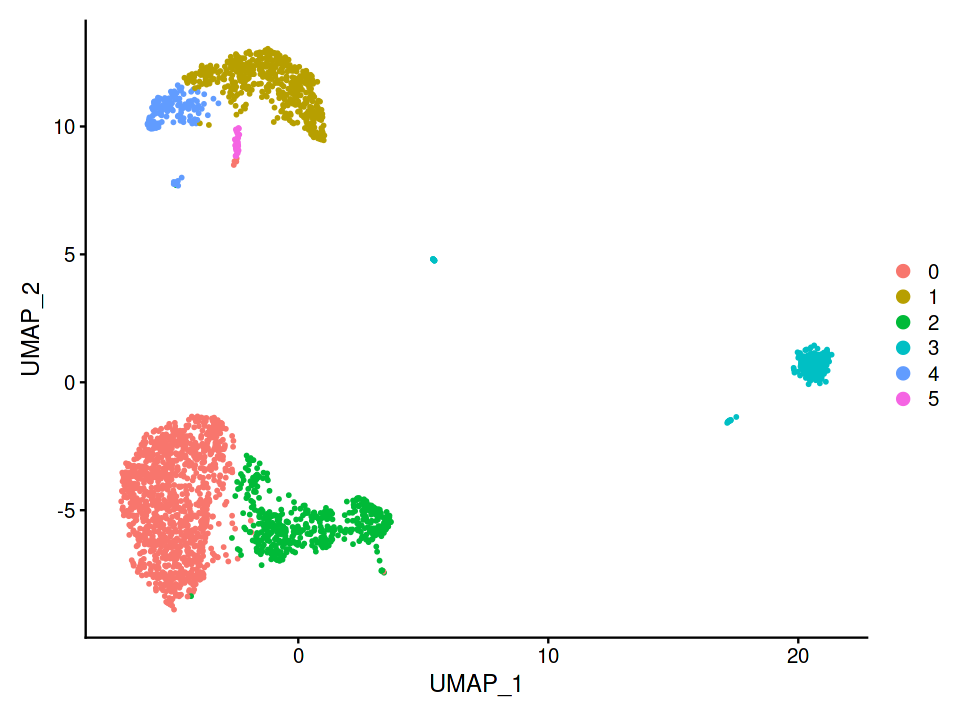

In [65]:
pbmc_max_change <- RunPCA(pbmc_max_change, features = c(VariableFeatures(object = pbmc_max_change)))

# Check number of PC components (we selected 10 PCs for downstream analysis, based on Elbow plot)
# ElbowPlot(pbmc)

# cluster and visualize
pbmc_max_change <- FindNeighbors(pbmc_max_change, dims = 1:10)
pbmc_max_change <- FindClusters(pbmc_max_change, resolution = 0.8)
pbmc_max_change <- RunUMAP(pbmc_max_change, dims = 1:10)
DimPlot(pbmc_max_change, reduction = "umap")

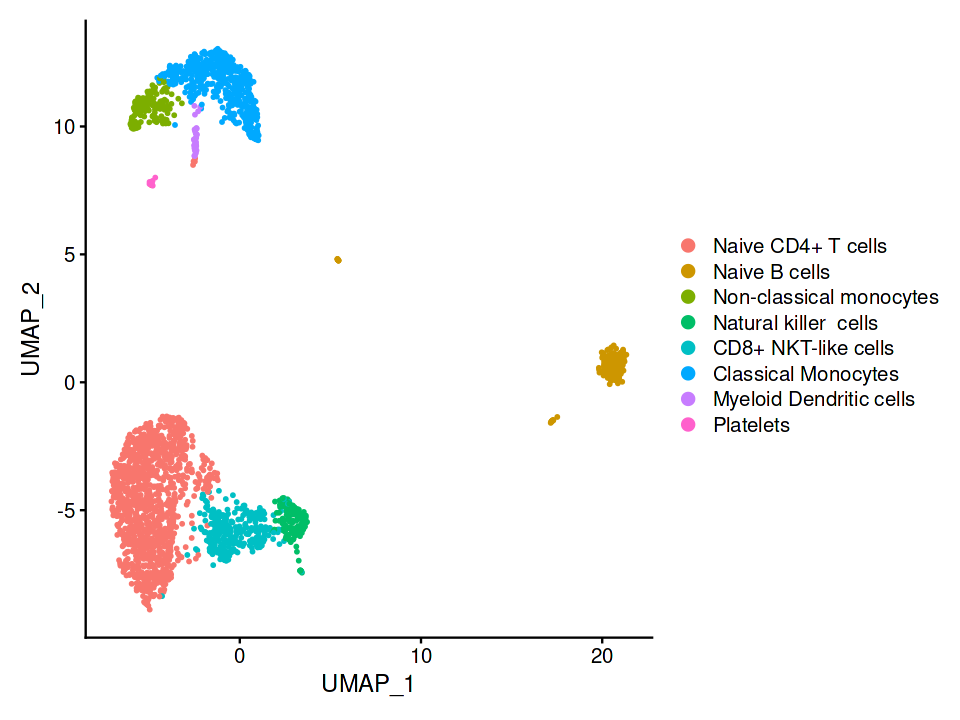

In [68]:
Idents(pbmc_max_change) = "clust_sc_type"
DimPlot(pbmc_max_change, reduction = "umap")

In [69]:
Class_sctype(t(pbmc_max_change[["RNA"]]$scale.data), pbmc_max_change@meta.data$clust_sc_type, "Naive B cells")

Warning message in checkGeneSymbols(markers_all):
“Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected.”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in checkGeneSymbols(markers_all):
“x contains non-approved gene symbols”
Warning message in

[1] "Naive B cells" "1"

### UMAP of max change attacked Naive B cells

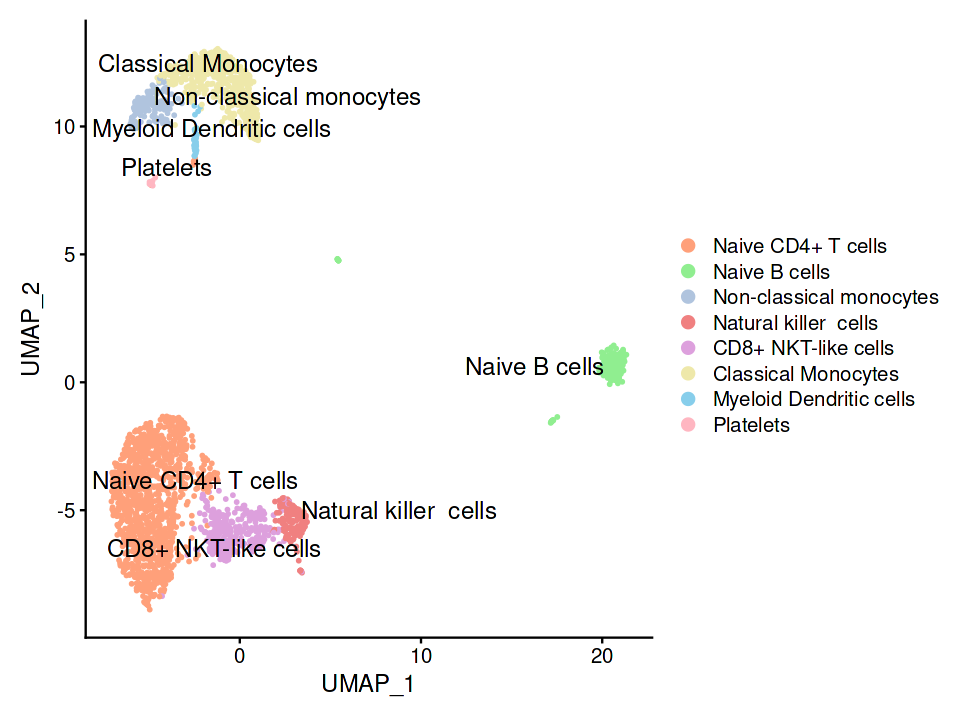

In [72]:
Idents(pbmc_max_change) = "clust_sc_type"
DimPlot(pbmc_max_change, label = T, cols=color_vector, repel=T, label.size=5)
ggsave("docs/appnote/pics/fig01_scale_A_max_change_umap.png", width=8, height=6)

# DotPlots

In [77]:
c_markers = c("IL7R", "CCR7", "CD14", "LYZ", "S100A4", "MS4A1", "CD8A", "FCGR3A", "MS4A7",
              "GNLY", "NKG7", "FCER1A", "CST3", "PPBP")

### DotPlot of raw data

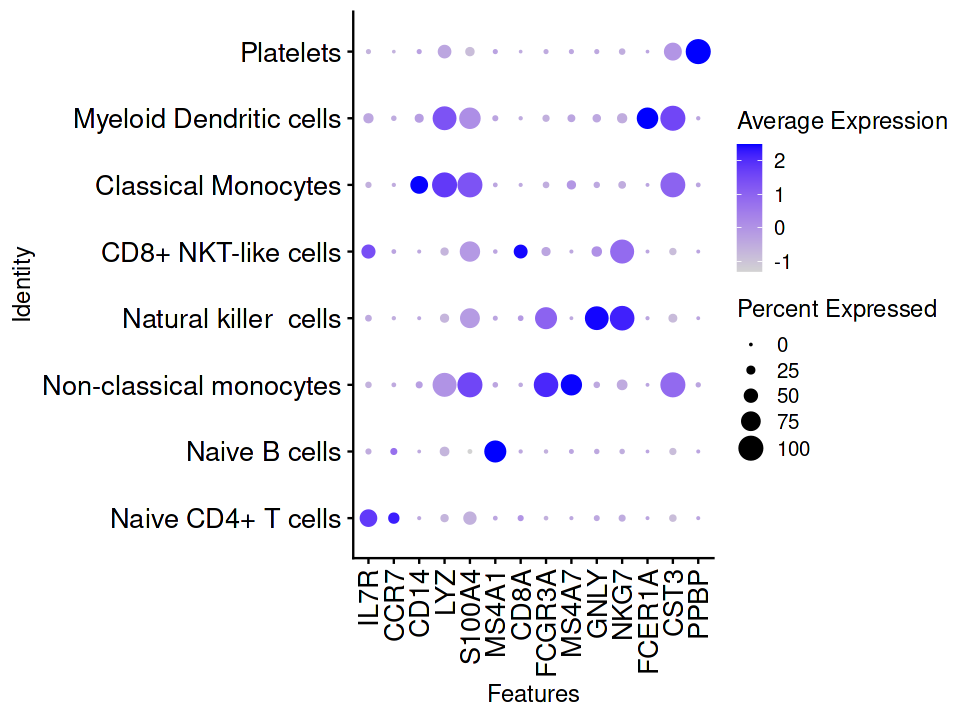

In [103]:
pbmc_4dp = pbmc
pbmc_4dp@assays$RNA$data = pbmc_4dp@assays$RNA$scale.data
DotPlot(pbmc_4dp, features=c_markers) +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=16),
        axis.text.y = element_text(size=16))
ggsave("im/fig01_B_scale_dotplot.png", width=9, height=6)

### DotPlot of single gene attack data

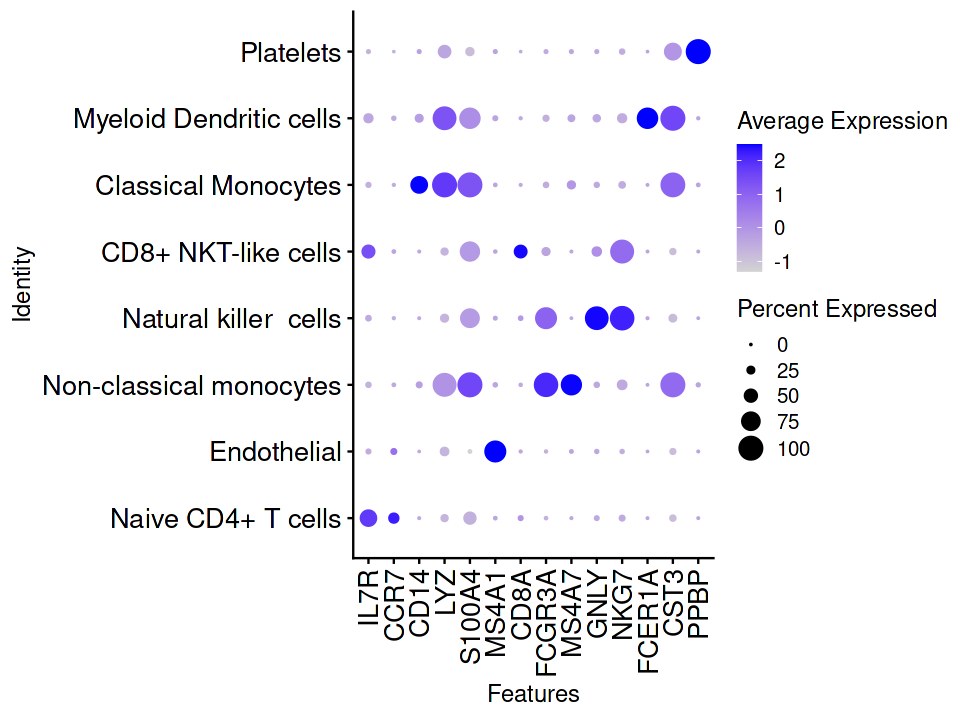

In [101]:
pbmc_min_change_4dp = pbmc_min_change
pbmc_min_change_4dp@assays$RNA$data = pbmc_min_change_4dp@assays$RNA$scale.data
DotPlot(pbmc_min_change_4dp, features=c_markers) +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=16),
    axis.text.y = element_text(size=16))
ggsave("im/fig01_B_scale_dotplot_min_change.png", width=9, height=6)

### DotPlot of max change attack data

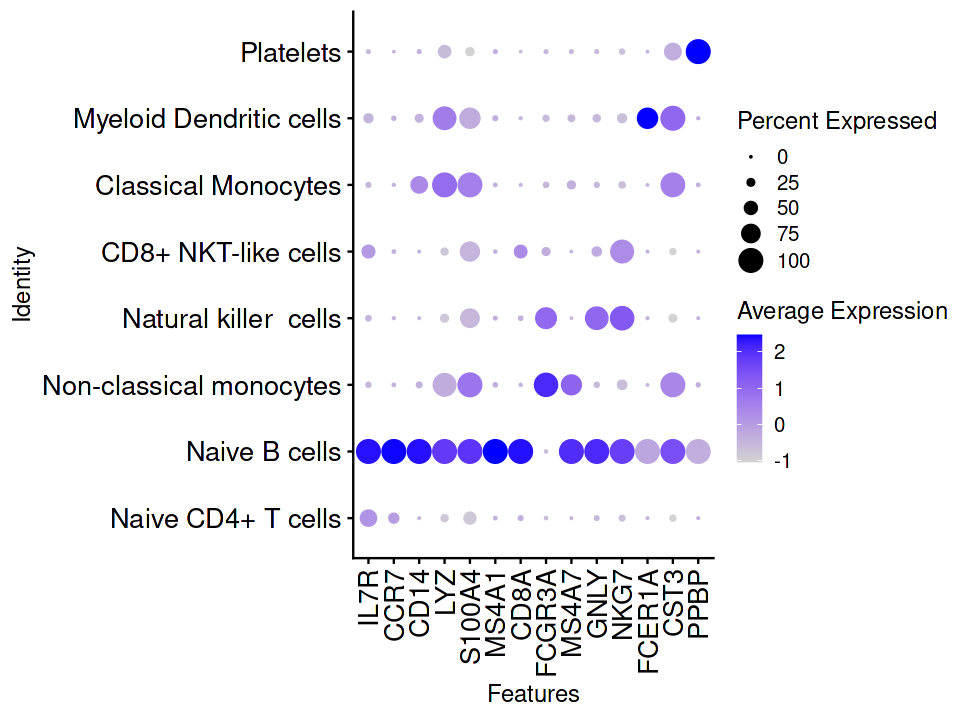

In [104]:
pbmc_max_change_4dp = pbmc_max_change
pbmc_max_change_4dp@assays$RNA$data = pbmc_max_change_4dp@assays$RNA$scale.data
DotPlot(pbmc_max_change_4dp, features=c_markers) +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=16),
    axis.text.y = element_text(size=16))
ggsave("im/fig01_B_scale_dotplot_max_change.png", width=9, height=6)